# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Основная задача — установить параметры для определения рыночной стоимости объектов недвижемости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699,23699,23699,23699,14504,23613,21796,23699,21421,12180,18157,18180,18181,8079,18181,9110,20518
mean,9.85848,6.54155e+06,60.3487,2.07064,2.7715,10.6738,34.4579,5.89236,10.5698,1.15008,28793.7,14191.3,0.611408,490.805,0.770255,517.981,180.889
std,5.68253,1.0887e+07,35.6541,1.0784,1.26106,6.59717,22.0304,4.88525,5.90544,1.0713,12630.9,8608.39,0.802074,342.318,0.938346,277.721,219.728
min,0,12190,12,0,1,1,2,1,1.3,0,0,181,0,1,0,13,1
25%,6,3.4e+06,40,1,2.52,5,18.6,2,7,0,18585,9238,0,288,0,294,45
50%,9,4.65e+06,52,2,2.65,9,30,4,9.1,1,26726,13098.5,0,455,1,502,95
75%,14,6.8e+06,69.9,3,2.8,16,42.3,8,12,2,37273,16293,1,612,1,729,232
max,50,7.63e+08,900,19,100,60,409.7,33,112,5,84869,65968,3,3190,3,1344,1580


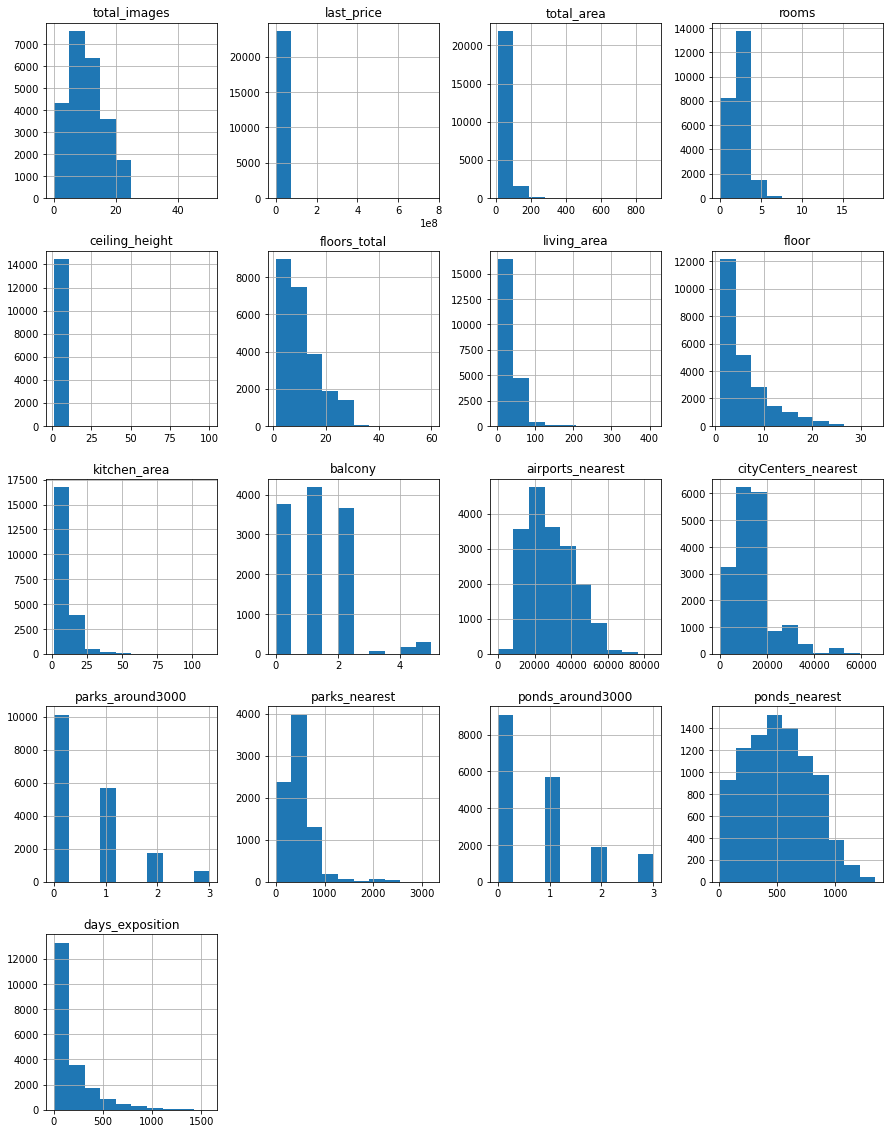

In [6]:
data.hist(figsize=(15, 20));

## Предобработка данных

### Обработка пропусков

Определим, в каких столбцах есть пропуски:

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
            .set_title('Пропуски' + "\n", fontsize = 22)    
        );    
    except:
        print('пропусков не осталось :) ')

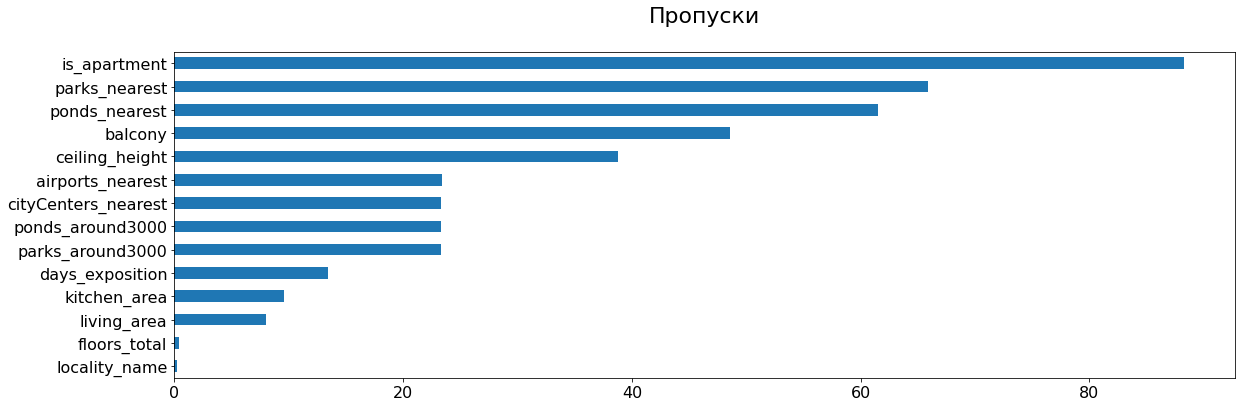

In [9]:
pass_value_barh(data)

Данные соодержат много пропусков. Большинство из них картографические, поэтому можно предположить, что пропуск соответсвует отсутсвию объекта (аэропорта, водоема, парка) поблизости. Пропуски в столбце `cityCenters_nearest` скорее всего означают, что населеный пункт не город.

Пропуски в данных, добавленные пользоваиелем могут быть связаны с необязательностью заполнения той или иной графы информации о жилье. В столбце `balcony` пропуски, скорее всего, означают, что в квартире нет балконов.

Столбец `is_apartment`, который содержит больше всего пропусков (больше 80 процентов), выглядит как техническая ошибка.

Заполним пропущенные значения там, где это возможно. В столбцах, где пропусков мало, можно удалить строки.

In [10]:
data['balcony'] = data['balcony'].fillna(0)
data = data.dropna(subset=['floors_total', 'locality_name'])

### Изменение типов данных

Из описания данных можно заметить:
- Три столбца должны иметь булев тип данных:
  * `is_apartment`
  * `studio`
  * `open_plan`

- Столбец `first_day_exposition` показывает даты публикации объявления, значит должен иметь соответсвующий тип.

- Столбцы `balcony`, `days_exposition`, `floor`, `floors_total`, `parks_around3000`, `ponds_around3000`, `rooms`, `total_images` содержат целочисленные значения. 
- Столбец `locality_name` должен иметь строковый тип.
- Остальные столбцы должны иметь вещественный тип данных.

Однако из-за пропусков не все данные можно преобразовать к нужному типу данных.

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

### Устранение дубликатов

In [12]:
data.duplicated().sum()

0

В данных нет явных дубликатов.
Неявные дубликаты могут попасться в столбцах со строковыми данными. Такой у нас только один - `locality_name`.

In [13]:
cities = data.query('not locality_name.isna()')
sorted(cities['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Для начала избавимся от "поселок" в данных, переименуем их в "посёлок". Также можно заметить, что встречаются разные типы посёлков: "посёлок городского типа", "посёлок", "городской посёлок", "коттеджный поселок". Объеденим их в один - посёлок.
Еще можно заметить,что встречаются "садоводческое некоммерческое товарищество" и "садовое товарищество", их названия не совпадают, но лучше объединить в одну группу СНТ.

In [14]:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный посёлок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции', 'станции')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', 'СНТ')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'СНТ')

In [15]:
data.locality_name.nunique()

319

### Обработка аномальных значений

In [16]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565,23565,23565,23565,14481,23565,21700,23565,21343,23565,18041,18064,18065,8030,18065,9036,20394
mean,9.87842,6.54006e+06,60.3228,2.07066,2.77128,10.6759,34.4548,5.87812,10.561,0.593677,28797.1,14192.7,0.611569,490.58,0.769499,518.29,180.741
std,5.68116,1.09109e+07,35.6571,1.07859,1.26198,6.59482,22.0454,4.87149,5.90063,0.96066,12632.5,8613.35,0.802088,341.573,0.938669,278.01,219.733
min,0,12190,12,0,1,1,2,1,1.3,0,0,181,0,1,0,13,1
25%,6,3.4e+06,40,1,2.51,5,18.6,2,7,0,18565,9238,0,288,0,293,45
50%,9,4.646e+06,52,2,2.65,9,30,4,9.1,0,26757,13096.5,0,455,1,503,95
75%,14,6.79e+06,69.7,3,2.8,16,42.3,8,12,1,37273,16285,1,612,1,730,231
max,50,7.63e+08,900,19,100,60,409.7,33,112,5,84869,65968,3,3190,3,1344,1580


В некоторых столбцах с данными о квартирах есть аномальные экстремумы.

- В квартире потолок может быть не ниже 2.5 м, при этом редко встречаются квартиры с потолкамим больше 4.5 м. Однако логично предположить, что некоторые высоты случайно указали как целый тип , а не вещественнный.
- Отсутсвие (0) комнат в квартире.
- Расстояние до аэропорта не может быть нулевым. Автор вероятно хотел сказать, что поблизости нет аэропортов.
- Цена 12 тыс за двукомнатную квартиру слишком маленькая, возможно, автор потерял пару нулей при записи.
- В многоквартирных домах в основном число этажей не превышает 27.

In [17]:
# слишком большие целочисленные высоты поделим на 10
for height in data['ceiling_height'].unique():
    if height >= 20:
        data.loc[data['ceiling_height'] == height, 'ceiling_height'] = height / 10

In [18]:
# заменим значение 0 в расстоянии до аэропорта на неизвестное
import numpy as np
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = np.NaN

In [19]:
# домножим на 100 аномальную стоимость
data.loc[data['last_price'] == 12190, 'last_price'] = 1219000

Для выявления остальных аномалий обратимся к графикам.

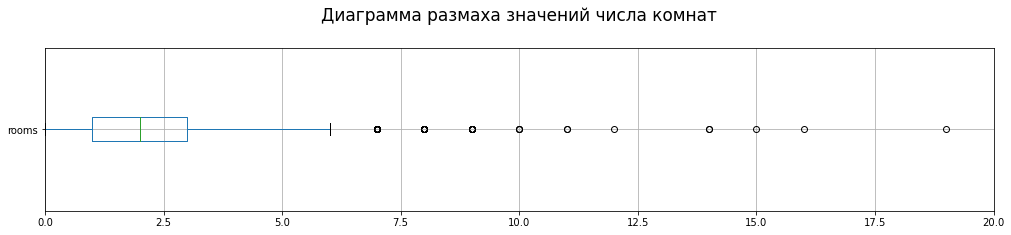

In [20]:
fig, ax = plt.subplots(figsize = (17,3))
ax = data[['rooms']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений числа комнат'+ "\n", fontsize = 17)
ax.set_xlim(0, 20);

Все значения, которые находятся за пределами "усов" редкие, поэтому считаются аномальными. Смело можно избавляться от квартир с числом комнат больше 7.

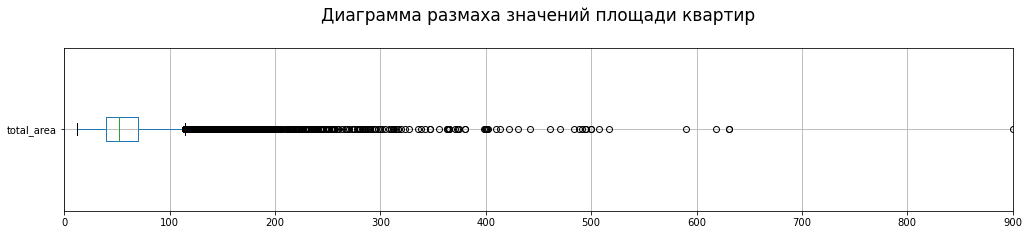

In [21]:
fig, ax = plt.subplots(figsize = (17,3))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади квартир' + "\n", fontsize = 17)
ax.set_xlim(0, 900);

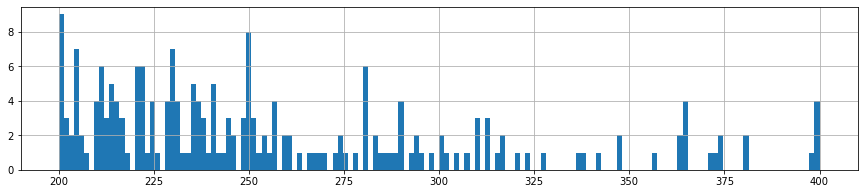

In [22]:
data.total_area.hist(bins = 150, figsize = (15,3), range=(200, 400));

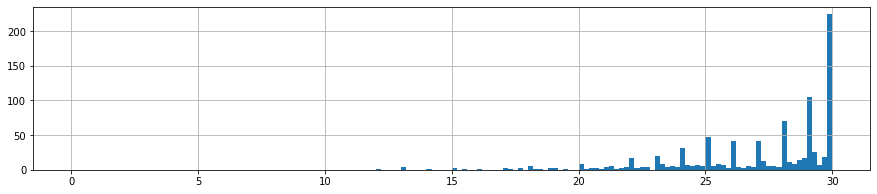

In [23]:
data.total_area.hist(bins = 150, figsize = (15,3), range=(0, 30));

Из графиков видно, что значения превышающие 285 очень редки, а из гистограммы видно, что также редки значения до 25.

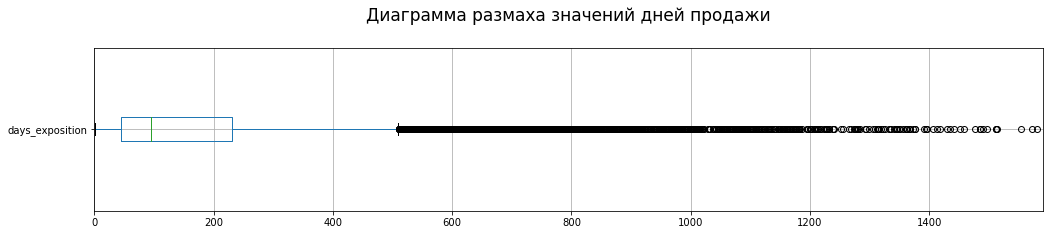

In [24]:
fig, ax = plt.subplots(figsize = (17,3))
ax = data[['days_exposition']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений дней продажи' + "\n", fontsize = 17)
ax.set_xlim(0, 1590);

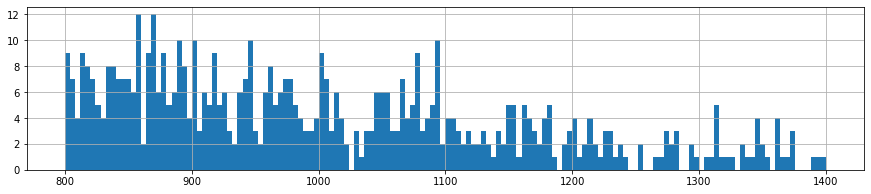

In [25]:
data.days_exposition.hist(bins = 150, figsize = (15,3), range=(800, 1400));

Из графика видно, что значений за пределами "усов" много, но начиная с 1100 становятся редкими - аномальными. Поэтому можно избавиться от квартир, которые были на продаже более 1100 дней.

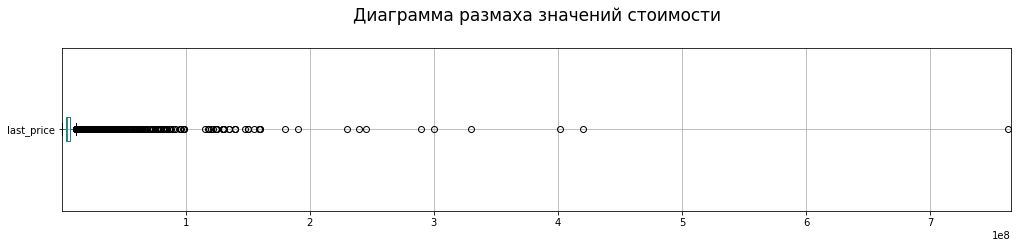

In [26]:
fig, ax = plt.subplots(figsize = (17,3))
ax = data[['last_price']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений стоимости' + "\n", fontsize = 17)
ax.set_xlim(430000, 765000000);

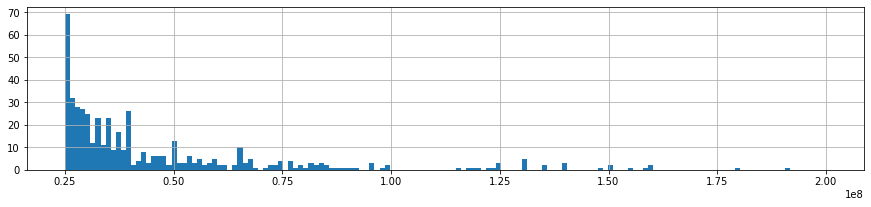

In [27]:
data.last_price.hist(bins = 150, figsize = (15,3), range=(25000000, 200000000));

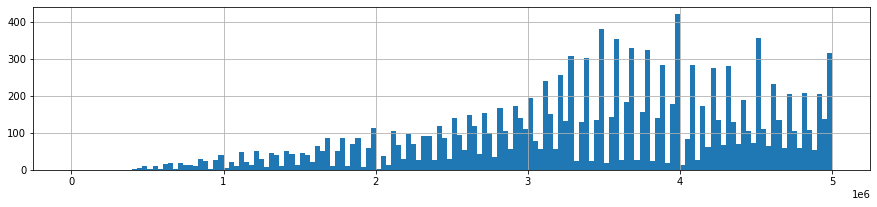

In [28]:
data.last_price.hist(bins = 150, figsize = (15,3), range=(0, 5000000));

Из графика видно, что выбросы после 50 млн становятся редкими, поэтому их можно отнести к аномалиям и избавиться от квартир, чья стоимость превышает данную сумму. При этом если рассмотреть гистограмму до медианного значения, можно заметить, что цены меньше 1 миллиона такая же редкость.

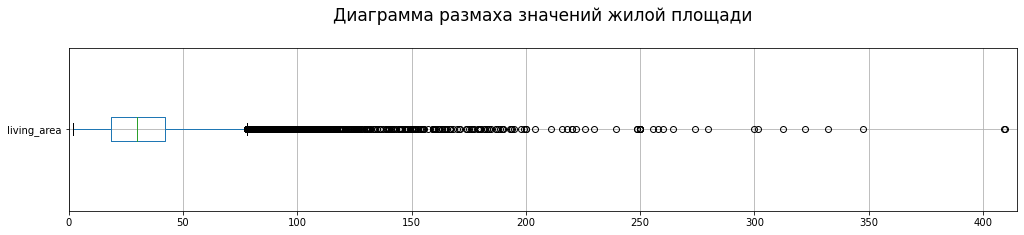

In [29]:
fig, ax = plt.subplots(figsize = (17,3))
ax = data[['living_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений жилой площади' + "\n", fontsize = 17)
ax.set_xlim(0, 415);

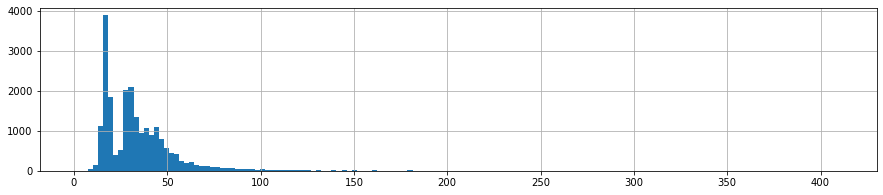

In [30]:
data.living_area.hist(bins = 150, figsize = (15,3));

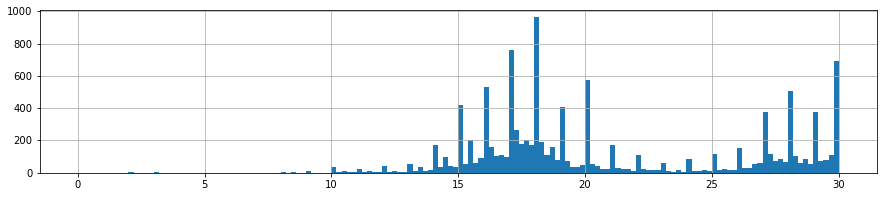

In [31]:
data.living_area.hist(bins = 150, figsize = (15,3), range=(0, 30));

Из графика видно, что выбросы выше 150 ставятся очень редкими. А из гистограммы до медианного значения видно, что значения меньше 13 также редки. Всвязи с этим можно вычеркнуть из нашего датасета квартира, чья жилая площадь не дотягивает до 13 и превышает 150.

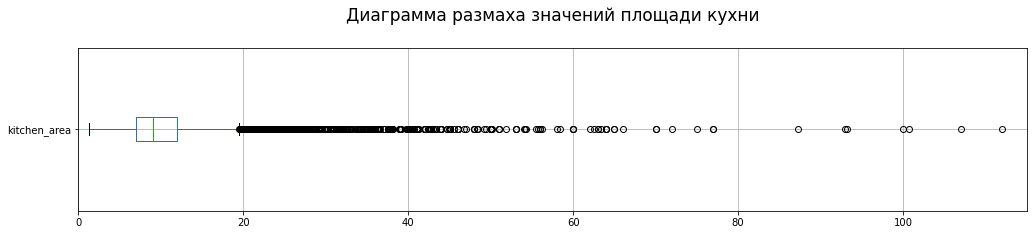

In [32]:
fig, ax = plt.subplots(figsize = (17,3))
ax = data[['kitchen_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади кухни' + "\n", fontsize = 17)
ax.set_xlim(0, 115);

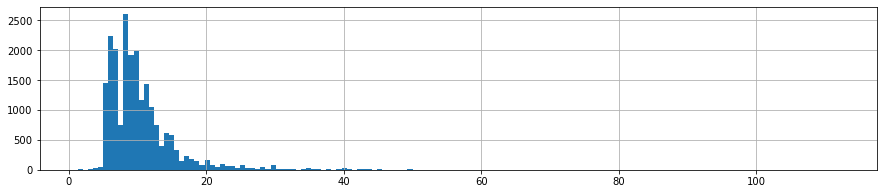

In [33]:
data.kitchen_area.hist(bins = 150, figsize = (15,3));

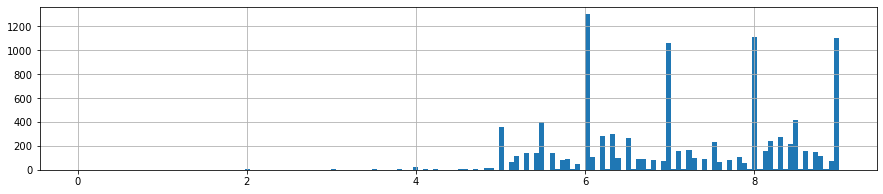

In [34]:
data.kitchen_area.hist(bins = 150, figsize = (15,3), range=(0, 9));

Из графика видно, что значения превышающие 40 аномальны. Также из гистограммы видно, что значения меньше 5 аномальны. Поэтому можно избавиться от квартир, у которых площадь кухни соответсвует аномальным значениям.

А теперь избавимся от квартир, чьи показатели были выявлены аномальными.

In [35]:
# Избавляемся от квартир с аномальным числом комнат
data = data.loc[data['rooms'] != 0]
data = data.loc[data['rooms'] <= 7]

# Избавляемся от слишком высоких домов
data = data.loc[data['floor'] <= 27]
data = data.loc[data['floors_total'] <= 27]

# Избавляемся от слишком высоких и низких потолков
data['ceiling_height'] = data['ceiling_height'].fillna(-1)
data = data[(data['ceiling_height'] >= 2.5) | (data['ceiling_height'] == -1)]
data = data.loc[data['ceiling_height'] <= 4.5]
data.loc[data['ceiling_height'] == -1, 'ceiling_height'] = np.NaN

# Избавляемся от квартир с аномальной площадью
data = data.query('25 <= total_area <= 285')

# Избавляемся от предложений, которые висели слишком долго
data['days_exposition'] = data['days_exposition'].fillna(-1)
data = data.query('days_exposition < 1100')
data.loc[data['days_exposition'] == -1, 'days_exposition'] = np.NaN # возвращаю неизвестные значения

# Избавляемся от квартир с аномальной ценой
data = data.query('1000000 <= last_price <= 50000000')

# Избавляемся от квартир с аномальной жилой площадью
data['living_area'] = data['living_area'].fillna(-1)
data = data.query('13 <= living_area <= 150 or living_area == -1')
data.loc[data['living_area'] == -1, 'living_area'] = np.NaN

# Избавляемся от квартир с аномальной площадью кухни
data['kitchen_area'] = data['kitchen_area'].fillna(-1)
data = data.query('5 <= kitchen_area <= 40 or kitchen_area == -1').reset_index(drop=True)
data.loc[data['kitchen_area'] == -1, 'kitchen_area'] = np.NaN

## Добавление новых столбцов в таблицу 

In [36]:
# добавим столбец с ценой за 1 квадратный метр
data['cost_for_sq_meter'] = data['last_price'] / data['total_area']

In [37]:
# добавим столбец с днем недели публикации объявления
# где пн - 0, вт - 1 и т.д.
data['weekday'] = data['first_day_exposition'].dt.weekday

In [38]:
# добавим столбец с месяцем публикации объявления
data['month'] = (
    pd.DatetimeIndex(data['first_day_exposition']).month)

In [39]:
# добавим столбец с годом публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [40]:
# добавим столбец категоризации этажей
def categorize_floor(row):
    flat_f = row['floor']
    house_f = row['floors_total']
    try:
        if flat_f <= 0:
            return 'аномалия'
        if flat_f == 1:
            return 'первый'
        if flat_f == house_f:
            return 'последний'
        return 'другой'
    except:
        return 'другой'

data['floor_type'] = data.apply(categorize_floor, axis=1)

In [41]:
# добавим столбец с расстоянием до центра города в км
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

## Исследовательский анализ данных

### Изучаем параметры

In [42]:
research_col = ['total_area', 'living_area', 'kitchen_area', 'last_price',
                'rooms', 'ceiling_height', 'floor', 'floors_total', 'cityCenters_nearest',
                'airports_nearest', 'parks_nearest', 'weekday', 'month']
data[research_col].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest,weekday,month
count,22173,20436,20334,22173,22173,13695,22173,22173,17161,17140,7586,22173,22173
mean,58.7646,33.6513,10.2243,5.94283e+06,2.06571,2.71851,5.86741,10.6743,14293.5,28855.6,490.889,2.56691,6.39904
std,26.7822,17.485,4.60546,4.60797e+06,0.985994,0.258461,4.81898,6.47649,8558.98,12660.4,338.202,1.7892,3.49149
min,25,13,5,1e+06,1,2.5,1,1,181,6450,1,0,1
25%,40.6,19,7,3.5e+06,1,2.515,2,5,9496,18476.5,289,1,3
50%,52.12,30,9,4.675e+06,2,2.65,4,9,13149,26905,456,3,6
75%,69,42.2,11.8,6.7e+06,3,2.8,8,16,16285,37407,613,4,10
max,284,150,40,5e+07,7,4.5,27,27,65952,84853,3190,6,12


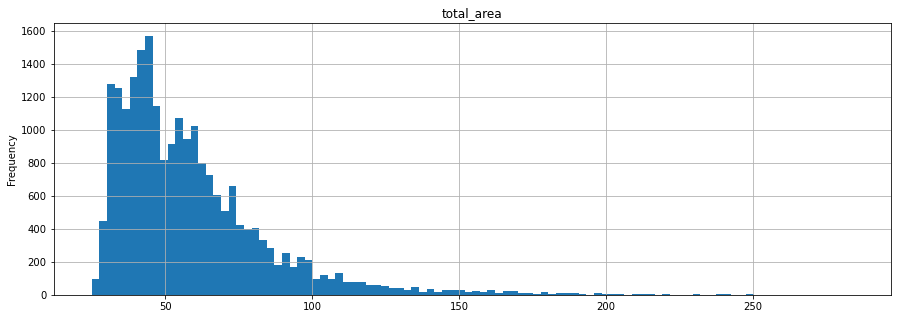

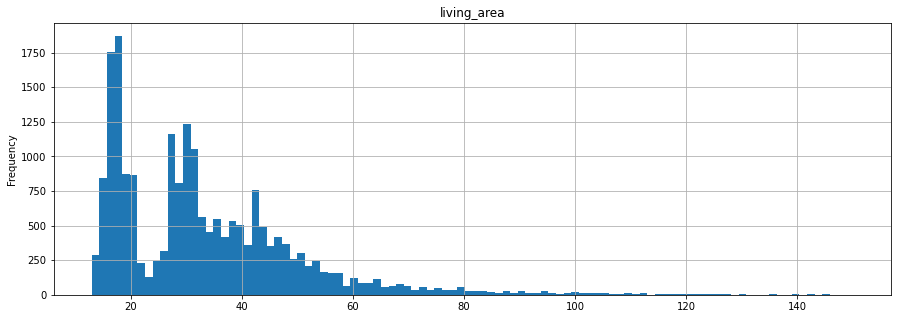

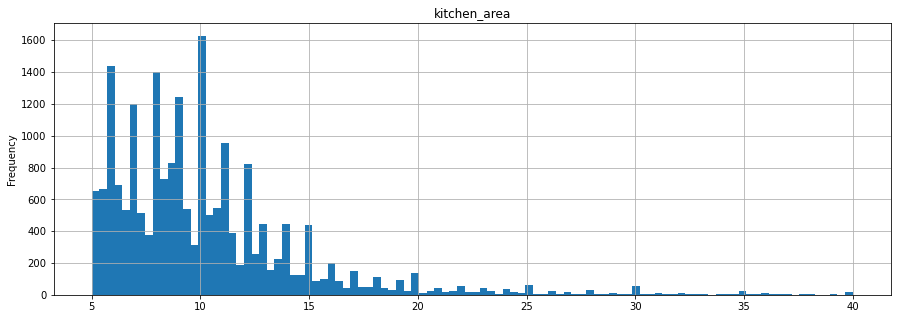

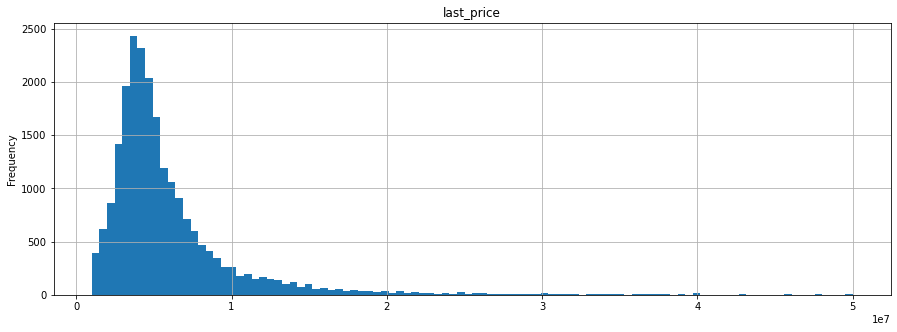

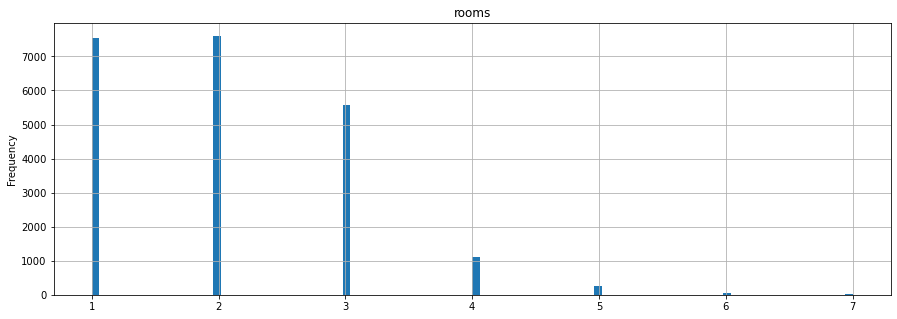

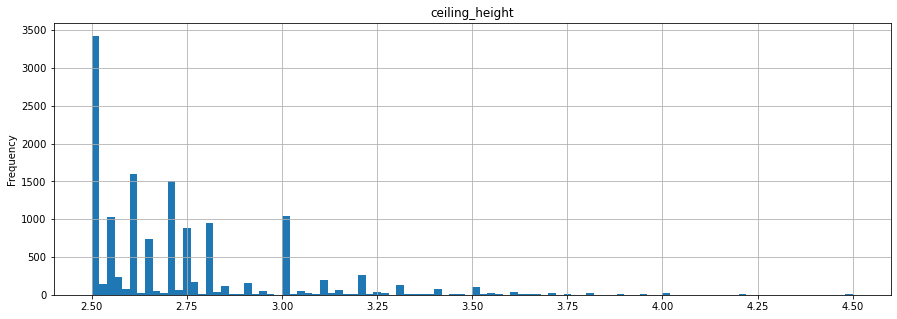

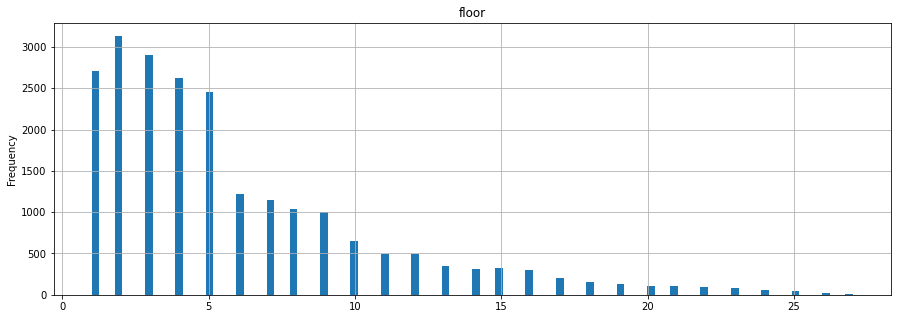

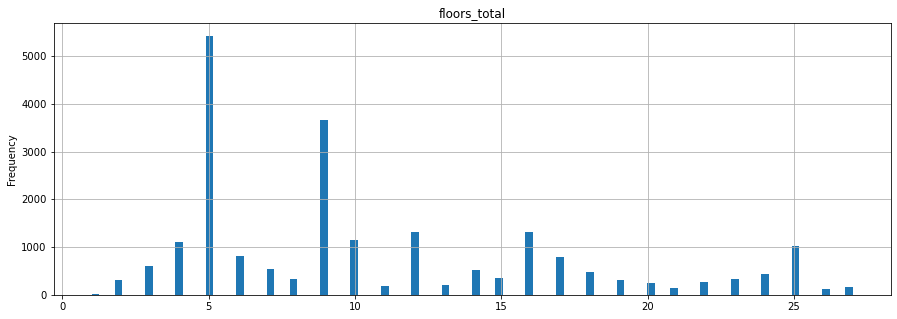

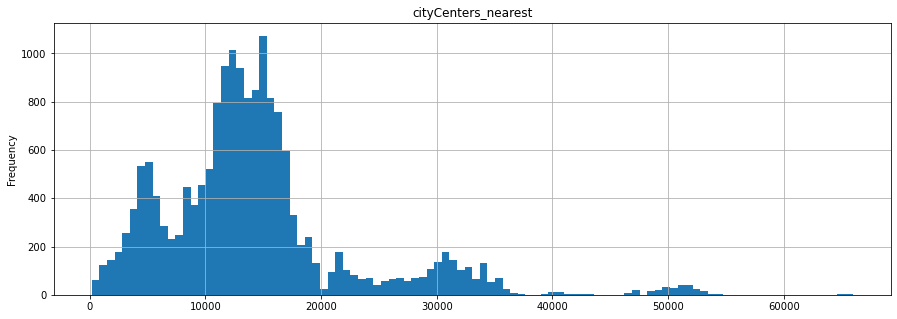

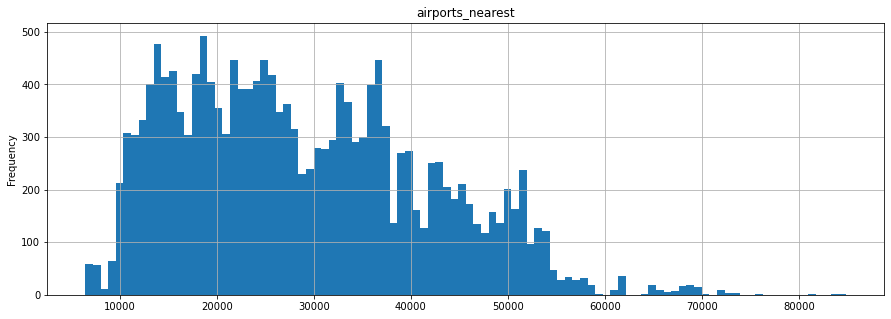

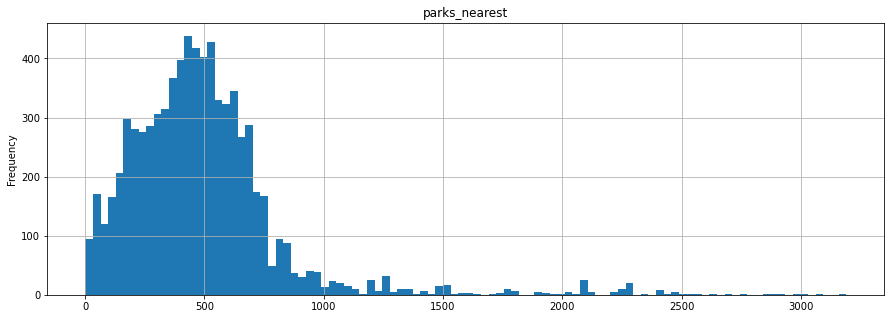

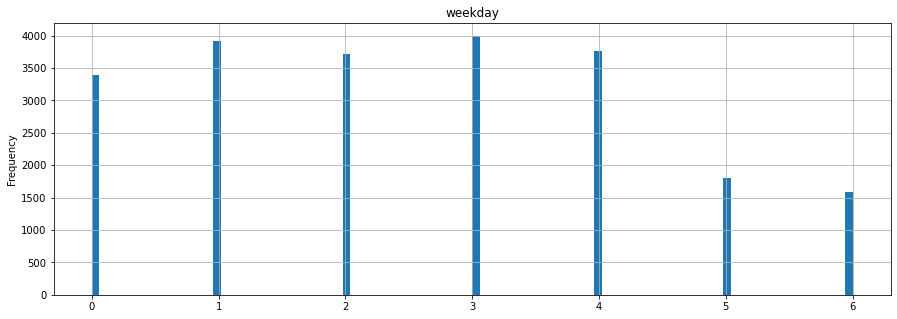

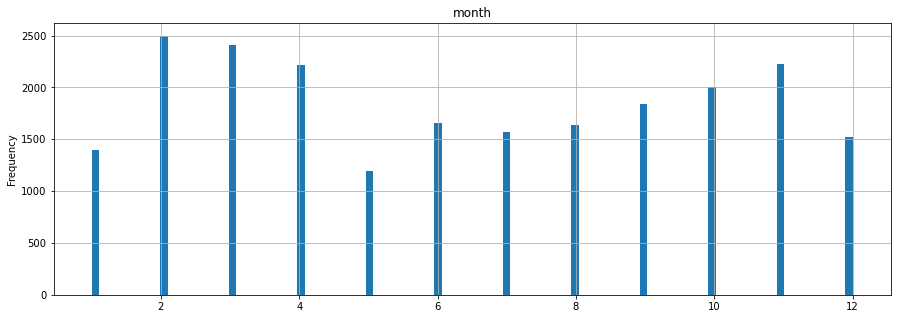

In [43]:
for col in research_col:
    data.plot(kind='hist', y=col, grid=True, title=col, legend=False, bins=100, figsize=(15, 5))

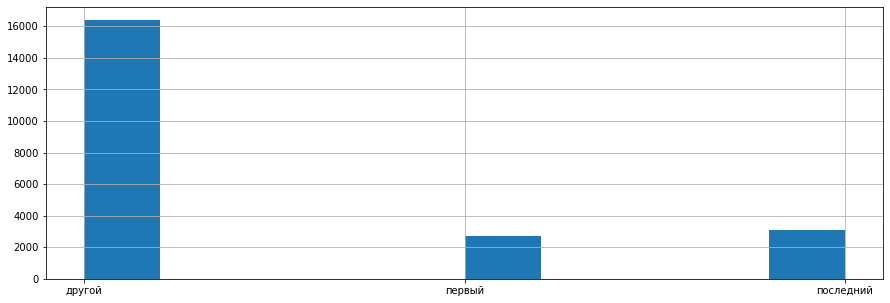

In [44]:
data['floor_type'].hist(figsize=(15,5));

Общая площадь имеет Пуассоновское распределение. Видно, что в основном площадь квартир находится между 25 и 50 кв м. Из сводной таблицы видно, что медианное значение достаточно близко к среднему арифметическому.

Жилая площадь имеет близкое к Пуассоновскому распределение, но сильно выражен пробел в данных между 20 и 25 кв м. Среднее и медианное значения достаточно близки. Наиболее частый размер жилой площади находится в районе 17 кв м.

Площадь кухни также имеет близкое к Пуассоновское распределение. Среднее и медианное значения очень близки. Самые частые значения 10 кв м и меньше.

Цена объекта имеет Пуассоновское расспределение. В основном объекты стоимостью до 10 миллионов, если обрезать значения в этом месте, то получится нормальное распределение. Медиана и среднее отличаются. Второе где-то между 50% и 75%.

По количеству комнат лидируют двушки и однушки, что вполне логично. Также достаточно много трехкомнатных квартир.

Высота потолков как и ожидалось в основном собралась на 2.5 метров, выше хоть и встречаются, но реже. Маленькое стандартное отклонение говорит об однородности данных.

Этажи квартир имеют Пуассоновское распределение. Большая часть данных расположена не выше пятого этажа, а именно на 2.

Среди типов этажа квартиры преобладает "другой", что соответсвует предыдущему выводу. Интересно заметить, что на графике число квартир на первых этажах близко к числу на последних этажах.

Общее количество этажей в доме имеет два выделяющихся значения, что соответсвует пяти- и девятиэтажным домам. Многоэтажных домов немного, но они есть. Среди них выделяются 10, 12, 16 и 25 этажные.

Расстояние до центра города в метрах имеет несколько скачков. Полагаю, скачки после пика соответсвуют каким-то скоплениям деревень или посёлков. Большая часть предложений находится между 10 и 17 км, полагаю, там расположены спальные районы города.

Гистограмма расстояние до ближайшего аэропорта имеет множество всплесков, вид похож на Пуассоновское распределение. Большая часть скопилась между 13 и 37 км. Медианное и среднее значения находятся достаточно близко друг к другу, если измерять в км.

Расстояние до ближайшего парка - самая маленькая выборка. Скорее всего она соответсвует только квартирам в городах. Среднее и медианное значения близки. Если отрезать аномальные значения, гистограмма примет вид нормального расспределения. Самое частое значение находится в районе 500 м.

Среди дней публикации чаще всего встречаются будние. Самые популярные - это вторник и четверг. Меньше всего в воскресенье.

Среди месяцев публикации лидируют февраль и март. Также заметна почти линейная тенденция роста начиная с мая до ноября. В мае было меньше всего публикаций.

### Изучим, как быстро продавались квартиры

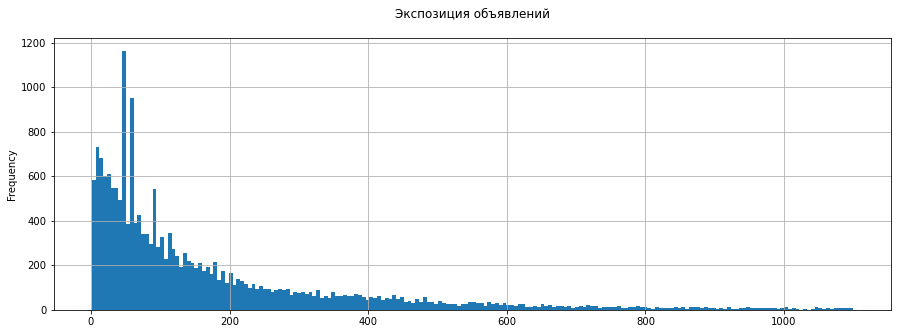

In [45]:
data.plot(kind='hist',
          y='days_exposition',
          grid=True,
          title='Экспозиция объявлений' + "\n",
          legend=False,
          bins=200,
          figsize=(15,5));

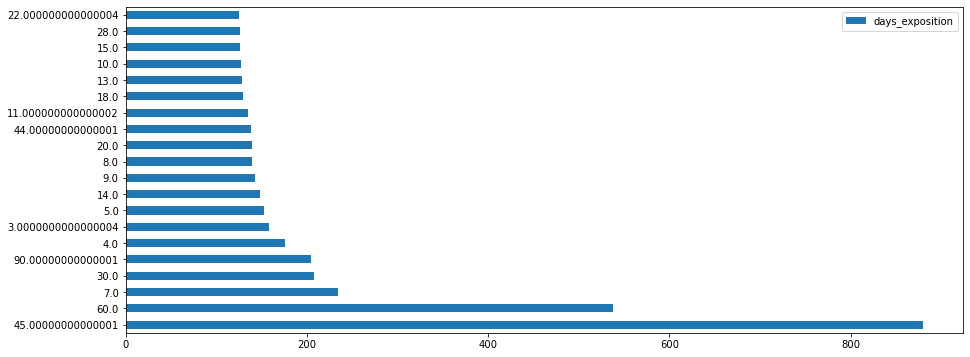

In [46]:
# Моды

df_check = pd.read_csv('real_estate_data.csv', sep = '\t')
    
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

In [47]:
data['days_exposition'].describe()

count    19201.000000
mean       172.084943
std        198.177672
min          1.000000
25%         45.000000
50%         94.000000
75%        225.000000
max       1099.000000
Name: days_exposition, dtype: float64

Из графика видно, что большинство квартир скупали в течении 3 месяцев. Самое пиковое значение 45, также выделяется 60, что соответсвуют моде.

Средняя продолжительность продажи квартиры - 172 дня - примерно полгода.
Медиана соответсвует 94 дня - примерно 3 месяца.

Самая короткая экспозиция соответсвует 1 дню. В целом продажа до 45 дней, что соответсвует 25 квантилю, - очень быстрая.
Самая долгая экспозиция была длиной в 1580 дней до предабротки, что составляет более 4 лет, и 1099 дней после, что составляет около 3.5 лет. Любую экспозицию более 225 дней, что соответсвует 75 квантилю, можно считать долгой.

Известно, что в Санкт-Петербурге и ЛО на продажу можно бесплатно выставлять только одно объявление сроком до 120 дней. Чтобы создать новые бесплатные объявления через полгода (точнее — 182 дня), сначала нужно будет снять с публикации старые. Бесплатный лимит не накапливается и не суммируется. Число платных публикаций не ограничено.

Наличие большого числа быстрых продаж может быть связано с тем, что объявление было повторно залито.

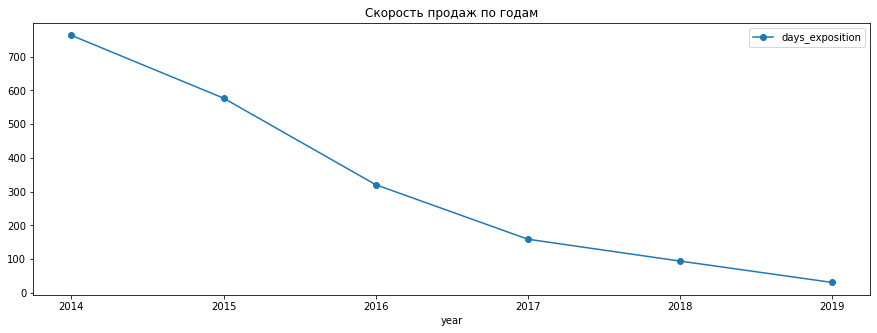

In [48]:
data.pivot_table(index='year', values='days_exposition').plot(style='o-', figsize=(15,5), title='Скорость продаж по годам');

### Выявление факторов, которые больше всего оказывают влияние на стоимость квартиры

Первый фактор: общая площадь квартиры.

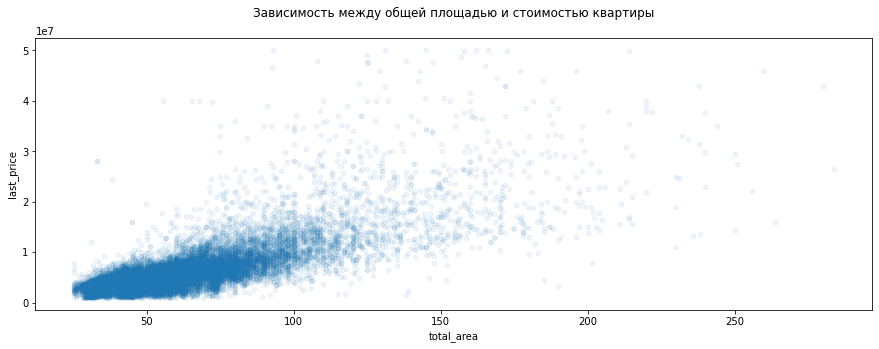

In [49]:
data.plot(x='total_area',
          y='last_price',
          kind='scatter',
          figsize=(15, 5),
          alpha=0.075,
          title='Зависимость между общей площадью и стоимостью квартиры' +'\n');

In [50]:
data['total_area'].corr(data['last_price'])

0.768202935474696

Из диаграммы рассеивания, особенно вначале, видно, что чем больше площадь квартиры, тем больше цена за нее. Корреляция у данных достаточно хорошая.

Вторым фактором является жилая площадь квартиры.

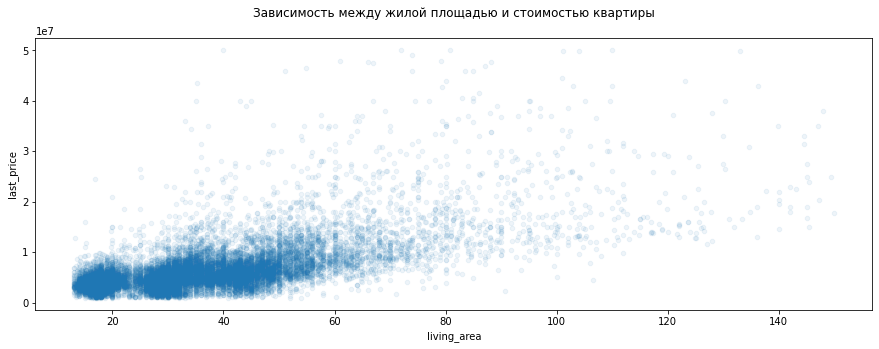

In [51]:
data.plot(x='living_area',
          y='last_price',
          kind='scatter',
          figsize=(15, 5),
          alpha=0.075,
          title='Зависимость между жилой площадью и стоимостью квартиры' +'\n');

In [52]:
data['living_area'].corr(data['last_price'])

0.6677513558963427

Диграмма похожа на предыдущую: также виден общий рост цены с увеличением жилой площади, но линейность хуэе. Корреляция также понизилась. Можно говорить не о прямой зависимости от параметра.

Следующий фактор - площадь кухни.

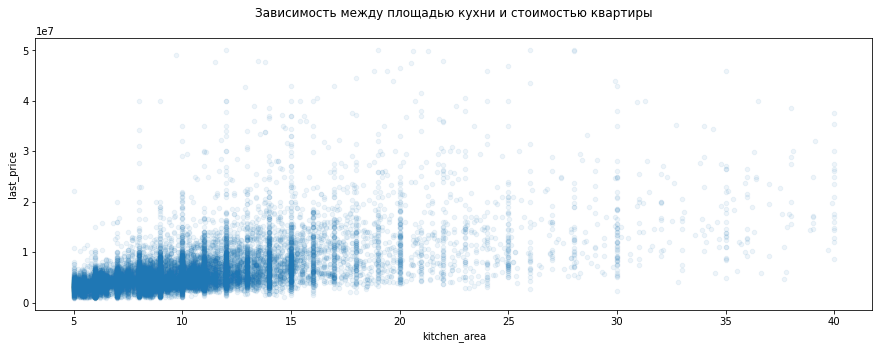

In [53]:
data.plot(y='last_price',
          x='kitchen_area',
          kind='scatter',
          figsize=(15, 5),
          alpha=0.075,
          title='Зависимость между площадью кухни и стоимостью квартиры' +'\n');

In [54]:
data['kitchen_area'].corr(data['last_price'])

0.579179225648275

Диаграмма похожа на предыдущие, но имеет более хаосную структуру. С ростом площади кухни цена может как рости, так и уменьшаться на небольших промежутках. Линия стала совсем дерганной. Корреляция гораздо ниже, чем у предыдущих параметров.

Четвертый фактор - число комнат в квартире.

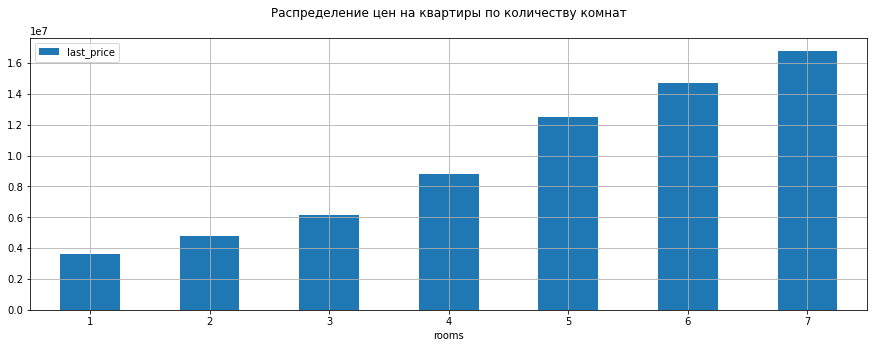

In [55]:
data.pivot_table(index='rooms',
                 values='last_price',
                 aggfunc='median').plot(kind='bar',
                                        figsize=(15,5),
                                        grid=True,
                                        rot=0.5,
                                        title='Распределение цен на квартиры по количеству комнат' +'\n');

Из графика видно, что медианное значение цены растет почти линейно. Можно сделать вывод, что цена зависит от числа комнат в квартире.

И последний фактор связанный с характеристикой квартиры - это тип этажа.

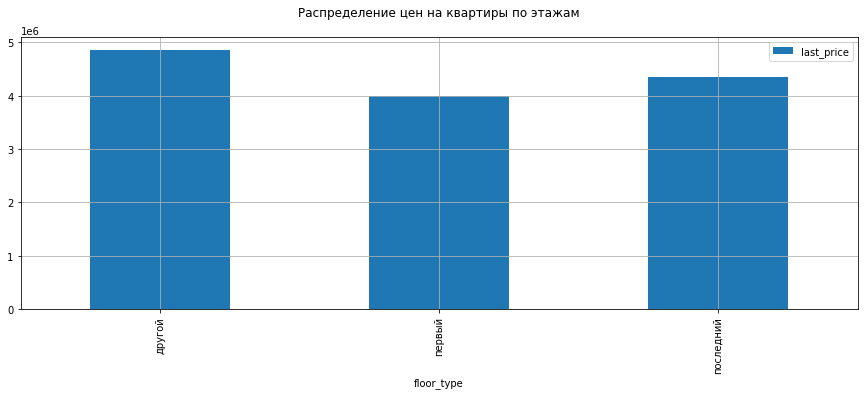

In [56]:
data.pivot_table(index='floor_type',
                 values='last_price',
                 aggfunc='median').plot(kind='bar',
                                        figsize=(15,5),
                                        grid=True,
                                        title='Распределение цен на квартиры по этажам' +'\n');

Из диаграммы видно, что разнится в цене в зависимости от типа этажа есть, но не очень большая. Самые низкие цены на первом, повыше на последнем и самые высокие на промежуточных этажах. Но не стоит забывать, что выборкии квартир на первом и последнем этажах сильно уступают выборке на промежуточных этажах. Исходя из этого, я считаю неккоректным строить какие-то выводы на этих данных.

Среди характеристик квартиры цена сильнее всего зависит от общего размера и числа комнат, а также немного от размера жилой площади. Остальные факторы слабо влияют на изменение цены за квартиру.

Теперь рассмотрим, есть ли зависимость от даты публикации объявления.

Первый фактор - день недели публикации.

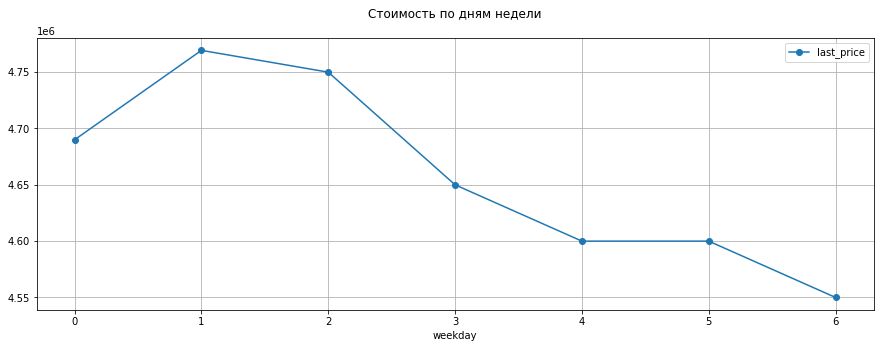

In [57]:
data.pivot_table(index='weekday',
                 values='last_price',
                 aggfunc='median').plot(style='o-',
                                        figsize=(15, 5),
                                        grid=True,
                                        title='Стоимость по дням недели' + '\n');

Из графика видно, что медианное значение цены падает к концу недели. Самые высокие показатели у вторника и среды, самые низки у воскресенья. Но стоит учесть, что и количество предложений также сокращается на выходных, в воскресенье меньше всего публикаций. Из-за чего делать выводы о зависимости можно только в будние дни, эти выборки соразмерны.

Тогда можно сказать, что стоимость за квартиры падает начиная со вторника. Самые маленькие цены в чт, самые высокие во вт.


Следующий фактор - месяц публикации объявления.

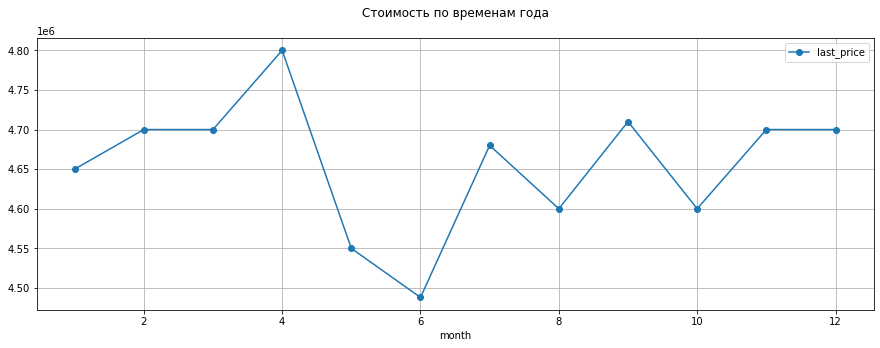

In [58]:
data.pivot_table(index='month',
                 values='last_price',
                 aggfunc='median').plot(style='o-',
                                        figsize=(15, 5),
                                        grid=True,
                                        title='Стоимость по временам года' + '\n');

Из графика можно заметить, что самые высокие цены в апреле, а самые низкие в июне. В начале года цена постепенно растет до апреля, до июня сильно падает падает, а затем меняется скачками до конца года.
Однако стоит учитывать, что и количество предложений падает перед летом и растет на его простяжении.

И последний фактор - это год публикации.

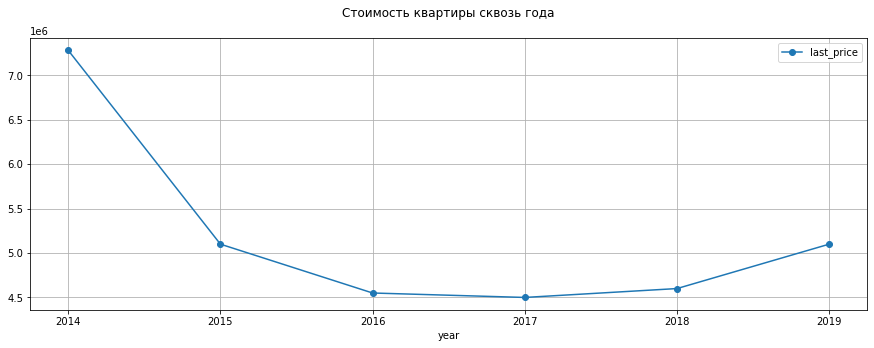

In [59]:
(
    data
    .pivot_table(index='year', values='last_price', aggfunc='median')
    .plot(style='o-', figsize=(15, 5), grid=True, title='Стоимость квартиры сквозь года' + '\n')
);

Из графика видно, что самые высокие цены были в 2014 году, после чего медиана резко упала в 2015 года и продолжала падать до 2017 года, после чего пошел рост. График напоминает седло параболы. 

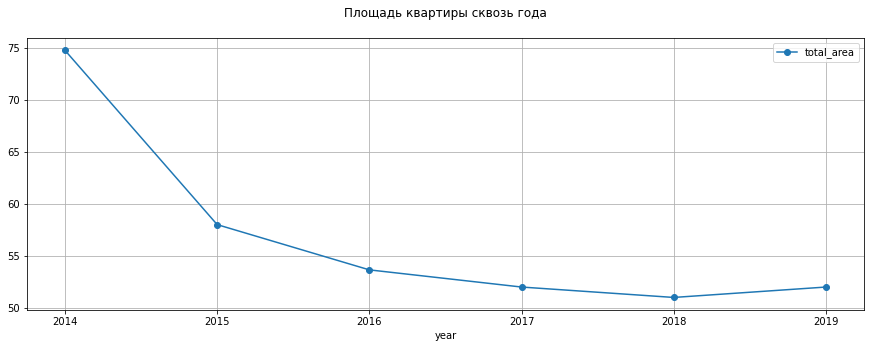

In [60]:
(
    data
    .pivot_table(index='year', values='total_area', aggfunc='median')
    .plot(style='o-', figsize=(15, 5), grid=True, title='Площадь квартиры сквозь года' + '\n')
);

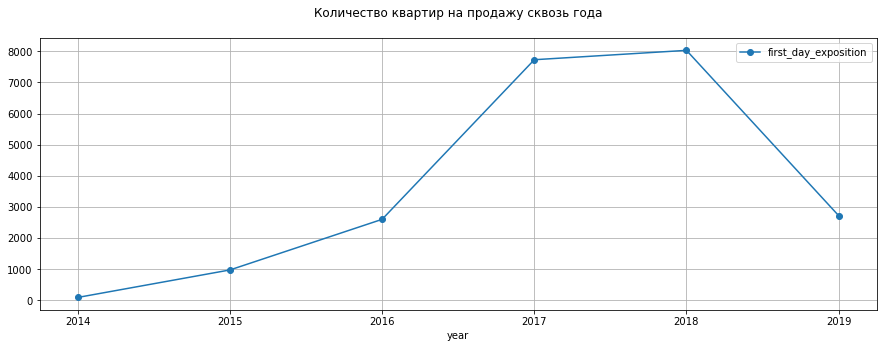

In [61]:
(
    data
    .pivot_table(index='year', values='first_day_exposition', aggfunc='count')
    .plot(style='o-', figsize=(15, 5), grid=True, title='Количество квартир на продажу сквозь года' +'\n')
);

Интересно заметить, что рост числа квартир на продаже обратно пропорционален росту площади и цене квартир.  Как мы знаем, площадь хоть и не единственный фактор зависимости, но хорошо коррелирует со стооимостью квартир. Можно также предположить, что большое число предложений рождало высокую конкуренцию, из-за чего продавцы снижали цену на квартиры, однако и сами квартиры в среднем стали меньше по размеру.

Также бросается в глаза стремление предложений в 2014 году к нулю, имея при этом самые высокие цены и самые большие квартиры. Из-за скудности выборки данные искажаются, поэтому строить предположения неккоректно.

Рассмотрев временные факторы, я пришла к выводу о том, что количество данных за каждый период очень разнится и строить выводы о зависимости стоимости от них будет некорректно.

### Расчитаем среднюю цену 1 кв м в населенных пунктах с самым большим числом объявлений

In [62]:
# Сгруппируем данные по населенным пунктам
data_grouped = data.pivot_table(index='locality_name', values='cost_for_sq_meter', aggfunc=['count', 'mean'])
data_grouped.columns = ['adv_count', 'mean_for_1_sqm']

# и отсортируем по числу объявлений
top_adv = data_grouped.sort_values(by='adv_count', ascending=False).head(10)
top_adv.round(2)

,adv_count,mean_for_1_sqm
locality_name,,
Санкт-Петербург,14847,111600.74
посёлок Мурино,490,84462.60
посёлок Шушары,421,77634.71
Всеволожск,383,68766.16
Пушкин,351,102974.19
Колпино,333,75255.83
посёлок Парголово,305,89860.18
Гатчина,301,69038.94
деревня Кудрово,271,92173.06


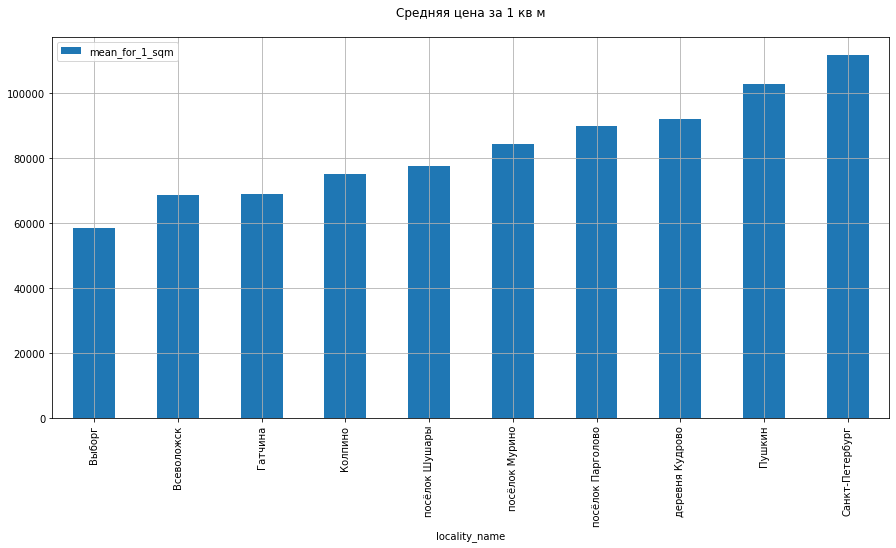

In [63]:
(
    top_adv
    .sort_values(by='mean_for_1_sqm')
    .plot(y='mean_for_1_sqm', kind='bar',figsize=(15,7), grid=True, title='Средняя цена за 1 кв м' +'\n')
);

In [64]:
# среди самых популярных населенных пунктов найдем с самой большой стоимостью за кв м
expensive = top_adv.sort_values(by='mean_for_1_sqm').index[-1]

# среди самых популярных населенных пунктов найдем с самой маленькой стоимостью за кв м
cheapest = top_adv.sort_values(by='mean_for_1_sqm').index[0]

print(f'''Среди населенных пунктов с наибольшим числом предложений {expensive} имеет самую высокую
среднюю стоимость за 1 квадратный метр, а самую низкую имеет {cheapest}.''')

Среди населенных пунктов с наибольшим числом предложений Санкт-Петербург имеет самую высокую
среднюю стоимость за 1 квадратный метр, а самую низкую имеет Выборг.


Большая часть квартир продается в Санкт-Петербурге (67%). Среди самых популярных мест продажи квартир наибольшую стоимость за один квадратный метр также имеет Петербург.

### Вычислим среднюю цену каждого километра в Санкт-Петербурге

In [65]:
# Выделим данные, относящиеся к Санкт-Петербургу
spb_data = (
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['mean', 'count'])
)
spb_data.columns = ['mean', 'count']
spb_data.sort_values(by='mean', ascending=False)

,mean,count
cityCenters_nearest_km,,
0.0,1.804515e+07,20
1.0,1.224876e+07,162
2.0,1.193745e+07,269
6.0,1.142577e+07,549
5.0,1.134256e+07,821
7.0,1.117338e+07,379
4.0,1.089827e+07,644
3.0,1.016961e+07,324
8.0,8.949839e+06,552


Из таблицы видно, что в пределе 8 км от центра средняя цена на недвижимость в 10 раз превышает более удаленные участки города. Значит цена зависит от расстояния до центра, но скорее по категориям, а не за каждый километр.

Среди данных выделяются квартиры на расстоянии 27 км от центра, но находящиеся в первой трети списка, однако данная выборка слишком мала относительно остальных.
Более того можно заметить, как резко уменьшается число предложений за пределами 24 км.

## Общий вывод

В процессе предобработки данных были выявлены аномальные данные и пропуски в данных. Причем в столбце `is_apartment` количество пропуск аномально велико. По возможности данные были скорректированы.

В ходе исследования было выявлено следующее:
- стоимость зависит от некоторых параметров квартиры (но все зависимости не линейны, влияют только в совокупности):
  - общая и жилая площадь квартиры
  - расстояние от центра города (для г. Санкт-Петербург) - в центре города дороже, в спальных районах дешевле
  - число комнат, чем больше комнат, тем выше цена
  - населенного пункта: в больших городах вроде Петербурга стоимость за кв м квартиры выше, чем в маленьких городах, деревнях и поселках

  Также искалась зависимость стоимости квартиры от даты публикации объявления, но большинство скачков в стоимости также сопровождались скачками в количестве объявлений, из-за чего надежные выводы построить нельзя.


- число предложенных квартир зависит от времени публикации: больше всего новых предложений публикуют в начале года (с февраля по апрель), в мае, число предложений резко падает и постепенно расстет на протяжении лета; в будние дни число предложений значительно выше, чем в выходные, в вс публикуют меньше всего
